In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fraud-detection' dataset.
Path to dataset files: /kaggle/input/fraud-detection


In [3]:
import os
print(os.listdir(path ))

['fraudTest.csv', 'fraudTrain.csv']


In [4]:
train_df = pd.read_csv(path + "/fraudTrain.csv")
test_df  = pd.read_csv(path + "/fraudTest.csv")

In [5]:
train_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
train_df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


The train dataset contains no null values

In [9]:
train_df.shape

(1296675, 23)

In [10]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

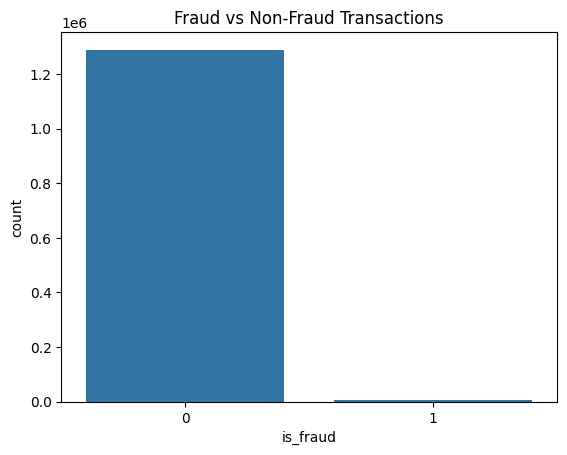

is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


In [11]:
sns.countplot(x='is_fraud', data=train_df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()
print(train_df['is_fraud'].value_counts(normalize=True)*100)


In [12]:
print("Duplicates:", train_df.duplicated().sum())

Duplicates: 0


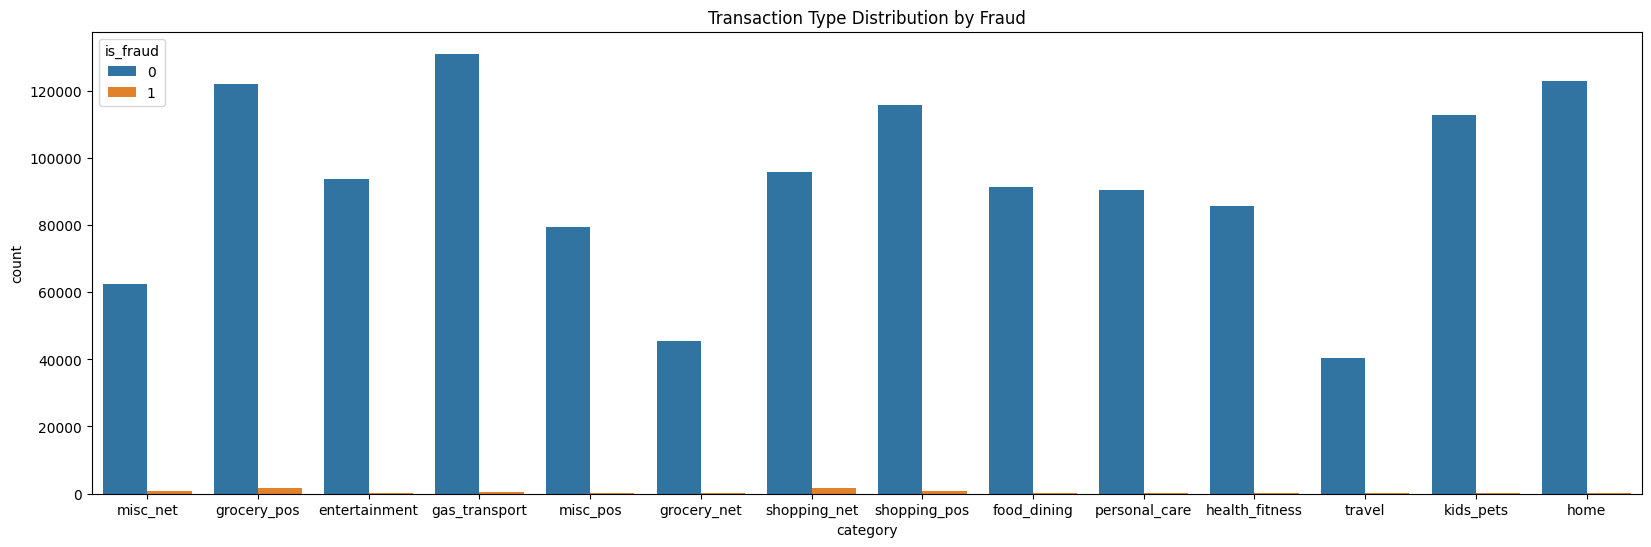

In [13]:
plt.figure(figsize=(20, 6))
sns.countplot(x='category', data=train_df, hue='is_fraud')
plt.title("Transaction Type Distribution by Fraud")
plt.show()
#print(train_df['is_fraud'].value_counts(normalize=True)*100)


In [14]:
print(train_df.groupby('category')['is_fraud'].value_counts(normalize=True)*100)

category        is_fraud
entertainment   0           99.752165
                1            0.247835
food_dining     0           99.834902
                1            0.165098
gas_transport   0           99.530606
                1            0.469394
grocery_net     0           99.705183
                1            0.294817
grocery_pos     0           98.590239
                1            1.409761
health_fitness  0           99.845131
                1            0.154869
home            0           99.839175
                1            0.160825
kids_pets       0           99.788561
                1            0.211439
misc_net        0           98.554205
                1            1.445795
misc_pos        0           99.686147
                1            0.313853
personal_care   0           99.757597
                1            0.242403
shopping_net    0           98.243851
                1            1.756149
shopping_pos    0           99.277462
                1        

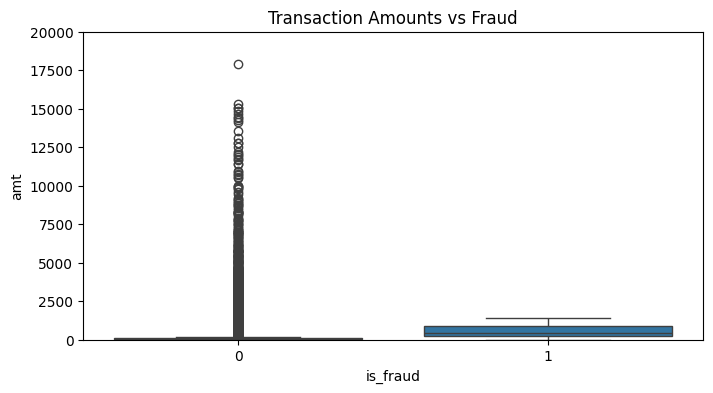

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(x='is_fraud', y='amt', data=train_df)
plt.ylim(0, 20000)
plt.title("Transaction Amounts vs Fraud")
plt.show()

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

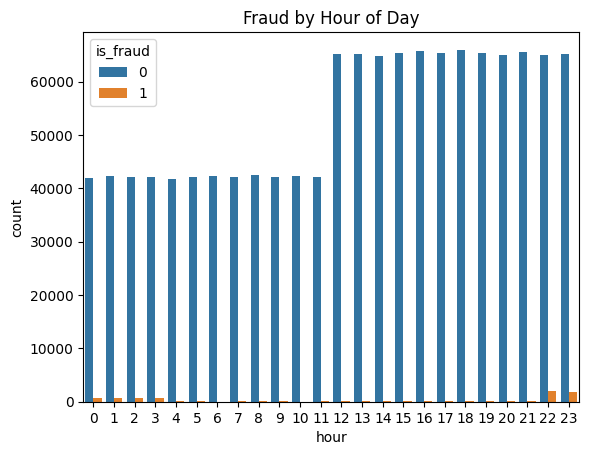

In [17]:
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
train_df['dayofweek'] = train_df['trans_date_trans_time'].dt.dayofweek

sns.countplot(x='hour', data=train_df, hue='is_fraud')
plt.title("Fraud by Hour of Day")
plt.show()

In [18]:
drop_cols = ['Unnamed: 0','cc_num','first','last','street',
             'city','state','zip','trans_num','merchant','dob','trans_date_trans_time']
train_df = train_df.drop(columns=drop_cols)
test_df = test_df.drop(columns=drop_cols)

In [19]:
train_df

,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,hour,dayofweek
0,misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,0,1
1,grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,0,1
2,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,0,1
3,gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,0,1
4,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0,12,6
1296671,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0,12,6
1296672,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0,12,6
1296673,food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0,12,6


Encoding

In [20]:
cat_cols = ['gender','category','job']
train_df = pd.get_dummies(train_df, columns=cat_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=cat_cols, drop_first=True)

# Align columns
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

In [21]:
from datetime import datetime
import numpy as np
# Distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    dlat = np.radians(lat2-lat1)
    dlon = np.radians(lon2-lon1)
    a = np.sin(dlat/2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2)**2
    return R * 2 * np.arcsin(np.sqrt(a))

train_df['distance'] = haversine(train_df['lat'], train_df['long'], train_df['merch_lat'], train_df['merch_long'])
test_df['distance'] = haversine(test_df['lat'], test_df['long'], test_df['merch_lat'], test_df['merch_long'])

Model Creation

In [22]:
X_train = train_df.drop(columns=['is_fraud'])
y_train = train_df['is_fraud']

X_test = test_df.drop(columns=['is_fraud'])
y_test = test_df['is_fraud']

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


[[553551     23]
 [  1680    465]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.95      0.22      0.35      2145

    accuracy                           1.00    555719
   macro avg       0.97      0.61      0.68    555719
weighted avg       1.00      1.00      1.00    555719

ROC AUC: 0.9398474286476614


In [24]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
y_prob = model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

Text(0.5, 1.0, 'Precision-Recall vs Threshold')

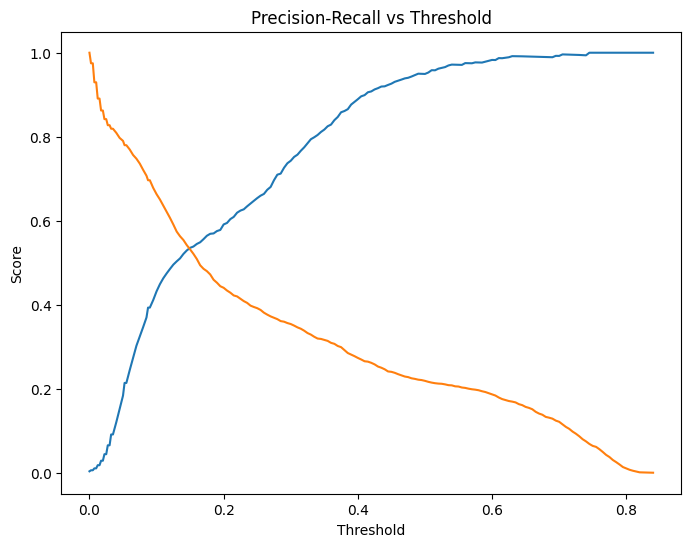

In [25]:
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")

In [28]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
y_prob = model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

for t in [ 0.2]:
    y_pred_t = (y_prob >= t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, y_pred_t, digits=4))
    print(confusion_matrix(y_test, y_pred_t))
    print("Accuracy",accuracy_score(y_test, y_pred_t))
    print("ROC AUC:", roc_auc_score(y_test, y_pred_t))


Threshold: 0.2
              precision    recall  f1-score   support

           0     0.9978    0.9988    0.9983    553574
           1     0.5914    0.4406    0.5049      2145

    accuracy                         0.9967    555719
   macro avg     0.7946    0.7197    0.7516    555719
weighted avg     0.9963    0.9967    0.9964    555719

[[552921    653]
 [  1200    945]]
Accuracy 0.9966655809860739
ROC AUC: 0.7196899165678408
